# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [7]:
df = pd.read_csv("data/data_clustered.csv")
X = df.drop(columns=('Cluster'))
Y = df['Cluster']
df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Cluster
0,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372,3
1,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244,0
2,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698,2
3,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581,3
4,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),Fair,18.616196,2171.646567,723.304215,14.916320,Rough,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898,1


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ship_Type                2127 non-null   object 
 1   Route_Type               2127 non-null   object 
 2   Engine_Type              2127 non-null   object 
 3   Maintenance_Status       2127 non-null   object 
 4   Speed_Over_Ground_knots  2127 non-null   float64
 5   Engine_Power_kW          2127 non-null   float64
 6   Distance_Traveled_nm     2127 non-null   float64
 7   Draft_meters             2127 non-null   float64
 8   Weather_Condition        2127 non-null   object 
 9   Cargo_Weight_tons        2127 non-null   float64
 10  Operational_Cost_USD     2127 non-null   float64
 11  Revenue_per_Voyage_USD   2127 non-null   float64
 12  Turnaround_Time_hours    2127 non-null   float64
 13  Efficiency_nm_per_kWh    2127 non-null   float64
 14  Seasonal_Impact_Score   

In [9]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2127 entries, 0 to 2126
Series name: Cluster
Non-Null Count  Dtype
--------------  -----
2127 non-null   int64
dtypes: int64(1)
memory usage: 16.7 KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [12]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()
 
# Normalisasi semua kolom numerik
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

categorical_columns = X.select_dtypes(include='object').columns.tolist()
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  
 
# Pisahkan fitur (X) dan target (y)
keep_columns = ['Ship_Type', 'Route_Type', 'Weather_Condition', 'Cargo_Weight_tons', 'Turnaround_Time_hours']

# Menghapus semua kolom kecuali yang ingin dipertahankan
X_filtered = X[keep_columns]

X = X_filtered

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1701, 5), y_train=(1701,)
Test set shape: X_test=(426, 5), y_test=(426,)


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ship_Type              2127 non-null   int32  
 1   Route_Type             2127 non-null   int32  
 2   Weather_Condition      2127 non-null   int32  
 3   Cargo_Weight_tons      2127 non-null   float64
 4   Turnaround_Time_hours  2127 non-null   float64
dtypes: float64(2), int32(3)
memory usage: 58.3 KB


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [57]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [62]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Update your model evaluation results dictionary
results = {
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    }

# Summarize the results in a DataFrame
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)

# Print the summary DataFrame
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree (DT),0.995305,0.995399,0.995305,0.995318
1,Random Forest (RF),0.995305,0.995399,0.995305,0.995318


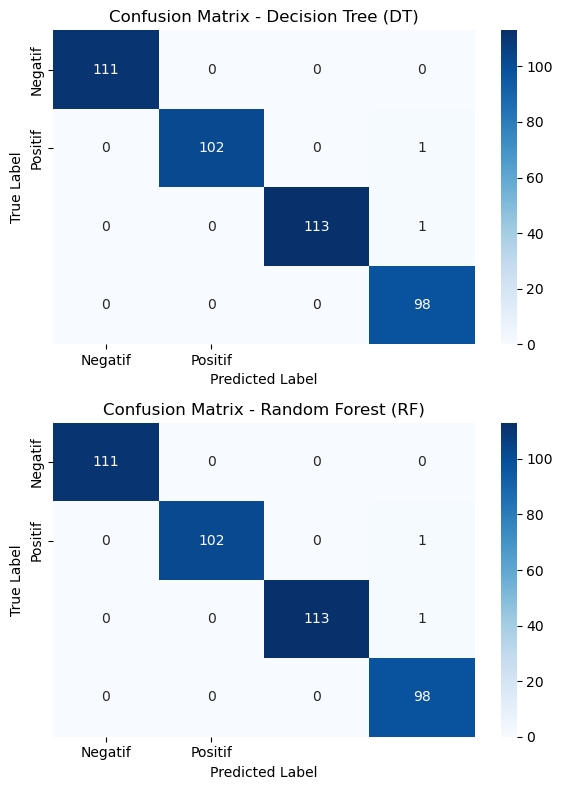

In [66]:
num_models = len(results)
fig, axes = plt.subplots(nrows=num_models, figsize=(6, 4 * num_models))

# Pastikan axes berbentuk list jika hanya ada satu model
if num_models == 1:
    axes = [axes]

for ax, (model_name, metrics) in zip(axes, results.items()):
    cm = metrics['Confusion Matrix']
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'], ax=ax)
    
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [25]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### **Hasil Evaluasi Model Klasifikasi**  

Setelah melatih dua model klasifikasi yang berbeda, performa setiap model dievaluasi menggunakan metrik **Accuracy, Precision, Recall, dan F1-Score**. Berikut adalah analisis dari hasil evaluasi tersebut:  

#### **1. Decision Tree (DT)**  
- **Accuracy:** 99.53%  
- **Precision:** 99.54%  
- **Recall:** 99.53%  
- **F1-Score:** 99.53%  
- **Analisis:**  
  Decision Tree menunjukkan performa yang sangat tinggi, dengan accuracy, precision, recall, dan F1-score yang hampir sempurna. Model ini mudah diinterpretasikan, tetapi memiliki risiko **overfitting**, terutama jika tidak dilakukan pruning atau optimasi lebih lanjut.  

#### **2. Random Forest (RF)**  
- **Accuracy:** 99.53%  
- **Precision:** 99.54%  
- **Recall:** 99.53%  
- **F1-Score:** 99.53%  
- **Analisis:**  
  Random Forest memberikan hasil yang identik dengan Decision Tree. Sebagai metode **ensemble learning**, Random Forest biasanya lebih stabil dan lebih tahan terhadap overfitting dibandingkan Decision Tree, karena menggabungkan banyak pohon keputusan untuk mendapatkan prediksi yang lebih andal.  

### **Kesimpulan:**  
Berdasarkan hasil evaluasi, **Decision Tree dan Random Forest memberikan hasil yang identik**, dengan accuracy **99.53%** serta precision, recall, dan F1-score yang sangat tinggi.  

- **Decision Tree** cocok jika interpretabilitas sangat dibutuhkan, tetapi lebih rentan terhadap overfitting.  
- **Random Forest** lebih robust karena mengurangi kemungkinan overfitting melalui kombinasi beberapa pohon keputusan.  

Jika mempertimbangkan keseimbangan antara **akurat, stabil, dan mudah diinterpretasikan**, **Random Forest menjadi pilihan yang lebih aman**, terutama untuk skenario produksi. Namun, jika kecepatan inferensi dan interpretabilitas lebih diutamakan, **Decision Tree bisa menjadi pilihan yang baik**. 🚀